In [226]:
import numpy as np
M = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
print(M)
eige,eigv=np.linalg.eigh(M)
print(eige)
print(eigv)
print(eigv[:,3]**2)

[[ 0.06  0.22 -0.22  0.08]
 [ 0.22  1.12 -0.08  0.25]
 [-0.22 -0.08  1.12 -0.25]
 [ 0.08  0.25 -0.25  2.04]]
[-0.0194343   1.04        1.13440758  2.18502672]
[[ 9.68595036e-01  4.78625567e-16 -2.32624857e-01  8.78028031e-02]
 [-1.75781313e-01  7.07106781e-01 -6.35570582e-01  2.55246872e-01]
 [ 1.75781313e-01  7.07106781e-01  6.35570582e-01 -2.55246872e-01]
 [ 5.05141313e-03 -9.12929873e-16  3.71464327e-01  9.28433485e-01]]
[0.00770933 0.06515097 0.06515097 0.86198874]


In [17]:
import numpy as np
H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
O = np.eye(4)
beta = 0.01
N = 100000
dt = beta/N
for i in range(N):
    O += -np.dot(H,O)*dt
print(O)

[[ 9.99405313e-01 -2.18521477e-03  2.18521477e-03 -7.86220135e-04]
 [-2.18521477e-03  9.88868280e-01  7.85612313e-04 -2.45897291e-03]
 [ 2.18521477e-03  7.85612313e-04  9.88868280e-01  2.45897291e-03]
 [-7.86220135e-04 -2.45897291e-03  2.45897291e-03  9.79813124e-01]]


In [89]:
import numpy as np
H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
O = np.eye(4)
beta = 100
N = 100000
dt = np.sqrt(beta)/N
for i in range(N):
    O += -2*(i+0.5)*dt*np.dot(H,O)*dt
print(O)
print(np.trace(O))

[[ 6.55079912e+00 -1.18884366e+00  1.18884366e+00  3.41637025e-02]
 [-1.18884366e+00  2.15752189e-01 -2.15752189e-01 -6.20005292e-03]
 [ 1.18884366e+00 -2.15752189e-01  2.15752189e-01  6.20005292e-03]
 [ 3.41637025e-02 -6.20005292e-03  6.20005292e-03  1.78170411e-04]]
6.982481663211586


In [92]:
import numpy as np
import math
H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
O = np.eye(4)
P = np.eye(4)
beta = 100
N = 10000000
dt = beta/N
for i in range(1,N):
    P = np.dot(P,H)*beta/i
    O += (-1)**(i)*P
print(O)

[[-1.93098621e+75 -1.98316412e+75 -3.11127206e+76  4.49757586e+76]
 [-2.14541923e+76  1.03225311e+77  5.65255192e+76  1.19575775e+77]
 [ 2.14541923e+76 -1.03225311e+77 -5.65255192e+76 -1.19575775e+77]
 [ 1.94284012e+76  6.85775828e+76 -2.34173793e+77 -4.81367274e+77]]


In [104]:
import numpy as np
import pandas as pd
import math

bset=[0.1*i for i in range(1,200)]
bsize=len(bset)
rcd=np.zeros((4,bsize))

for i in range(bsize):
    beta = bset[i]
    
    H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
    O1 = np.eye(4)
    O2 = np.eye(4)
    Ox = np.eye(4)
    P = np.eye(4)
    
    N = 10000
    dt1 = beta/N
    dt2 = np.sqrt(beta)/N
    
    for j in range(N):
        O1 += -np.dot(H,O1)*dt1
        O2 += -2*(j+0.5)*dt2*np.dot(H,O2)*dt2
        #
        P = np.dot(P,H)*beta/(j+1)
        Ox += (-1)**(j+1)*P
    rcd[0,i] = beta    
    rcd[1,i] = np.trace(O1)
    rcd[2,i] = np.trace(O2)
    rcd[3,i] = np.trace(Ox)
a=pd.DataFrame(rcd)
a.to_csv("rcd.txt")

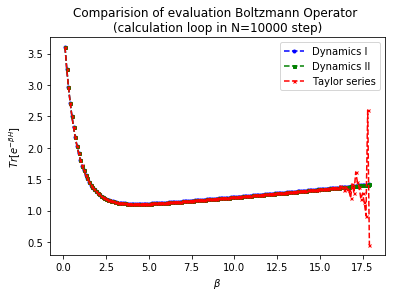

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a=pd.read_csv("rcd.txt")
rcd=a.values
bx=1
ex=180
plt.plot(rcd[0,bx:ex],rcd[1,bx:ex],'b--',marker='o',markersize=3,label='Dynamics I')
plt.plot(rcd[0,bx:ex],rcd[2,bx:ex],'g--',marker='s',markersize=3,label='Dynamics II')
plt.plot(rcd[0,bx:ex],rcd[3,bx:ex],'r--',marker='x',markersize=3,label='Taylor series')
plt.title("Comparision of evaluation Boltzmann Operator \n(calculation loop in N=10000 step)")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$Tr[e^{-\beta H}]$")
plt.legend(loc=1)
plt.savefig('a.png')
plt.show()

In [147]:
# renorm method
import numpy as np
import pandas as pd

H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
O = np.eye(4)
dt = 0.001
N = 10000
rcdxp=np.zeros((4,N))
ang=0.7

x=np.array([1,2,3,4]/np.sqrt(30))*np.cos(ang)
p=np.array([1,2,3,4]/np.sqrt(30))*np.sin(ang)
for i in range(N):
    x += - np.dot(H,x)*dt
    p += - np.dot(H,p)*dt
    scl = np.sqrt(sum(x**2)+sum(p**2))
    x = x/scl
    p = p/scl
    rcdxp[:,i]=x**2+p**2
aaa=pd.DataFrame(rcdxp.T)
aaa.to_csv('renorm.csv',header=None,sep=' ')

In [203]:
# scaling method
import numpy as np
import pandas as pd

H = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
H2 = np.dot(H,H)
O = np.eye(4)
dt = 0.001
N = 10000
rcdxp=np.zeros((4,N))
ang=0.5

x=np.array([1,2,3,4]/np.sqrt(30))*np.cos(ang)
p=np.array([1,2,3,4]/np.sqrt(30))*np.sin(ang)

for i in range(N):
    cc = np.dot(x,x)+np.dot(p,p)
    #print('b ',cc)
    
    mH=( np.dot(x, np.dot(H,x)) + np.dot(p, np.dot(H,p)) )
    mH2=( np.dot(x, np.dot(H2,x)) + np.dot(p, np.dot(H2,p)) )
    E=mH/cc #- 1/dt + np.sqrt(mH**2/cc**2-mH2/cc+1/dt**2)
    
    x += - np.dot(H,x)*dt + E*x*dt
    p += - np.dot(H,p)*dt + E*p*dt
    
    cc = np.dot(x,x)+np.dot(p,p)
    #print('e ',cc)
    
    rcdxp[:,i]=x**2+p**2
    
aaa=pd.DataFrame(rcdxp.T)
aaa.to_csv('scl.csv',header=None,sep=' ')

In [229]:
# renorm method
import numpy as np
import pandas as pd

R = np.array([[0.06,0.22,-0.22,0.08],[0.22,1.12,-0.08,0.25],[-0.22,-0.08,1.12,-0.25],[0.08,0.25,-0.25,2.04]])
E=2.5
H=( np.dot(R,R)-2*E*R+E*E*np.eye(4) )

O = np.eye(4)
dt = 0.001
N = 10000
rcdxp=np.zeros((4,N))
ang=0.7

x=np.array([1,2,3,4]/np.sqrt(30))*np.cos(ang)
p=np.array([1,2,3,4]/np.sqrt(30))*np.sin(ang)
for i in range(N):
    x += - np.dot(H,x)*dt
    p += - np.dot(H,p)*dt
    scl = np.sqrt(sum(x**2)+sum(p**2))
    x = x/scl
    p = p/scl
    rcdxp[:,i]=x**2+p**2
aaa=pd.DataFrame(rcdxp.T)
aaa.to_csv('arbi_%.1f.csv'%E,header=None,sep=' ')